In [8]:
import numpy as np
import pandas as pd
from pyBKT.models import Model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [9]:
model = Model(seed = 60, num_fits = 1)

In [10]:
model.fetch_dataset("https://raw.githubusercontent.com/lishaparmar13/H5P-Enhanced-BKT/main/Under16-SS.csv",'.')

In [11]:
df4= pd.read_csv(r"Under16-SS.csv", encoding ='latin')
df4.tail(5)

,Row,Anon Student Id,Age,Problem Hierarchy,question_id,Step Start Time,Step End Time,Correct First Attempt,Step Duration (sec),Answer Type,KC(Default),skill_id,Opportunity (Default),template_id
375,23,23,16,2,9,22-07-2023 18:17,22-07-2023 18:17,1,11,Single Choice set,Percentages,5,1,6
376,3,3,16,2,9,13-07-2023 17:56,13-07-2023 17:57,0,60,Single Choice set,Ratio and Proportion,6,1,6
377,4,4,16,2,9,15-07-2023 14:58,15-07-2023 14:59,1,60,Single Choice set,Ratio and Proportion,6,1,6
378,22,22,16,2,9,22-07-2023 17:47,22-07-2023 17:47,0,29,Single Choice set,Ratio and Proportion,6,1,6
379,23,23,16,2,9,22-07-2023 18:17,22-07-2023 18:17,1,11,Single Choice set,Ratio and Proportion,6,1,6


In [12]:
train_df, test_df = train_test_split(df4, test_size=0.2, random_state=42)

In [13]:
model.fit(data = df4)

In [14]:
model.fit(data_path = 'Under16-SS.csv')
print("Fitted Skills:\n%s" % '\n'.join(model.coef_.keys()))

Fitted Skills:
Fractions
Ratio and Proportion
Percentages
Numbers
Geometry
Algebra


In [15]:
# Evaluate with the default RMSE then specify AUC.
model.fit(data = df4)
training_rmse = model.evaluate(data = df4)
training_auc = model.evaluate(data = df4, metric = 'auc')
print("Training RMSE: %f" % training_rmse)
print("Training AUC: %f" % training_auc)

Training RMSE: 0.466807
Training AUC: 0.641372


In [16]:
#define own metric
def mae(true_vals, pred_vals):
  """ Calculates the mean absolute error. """
  return np.mean(np.abs(true_vals - pred_vals))

training_mae = model.evaluate(data = df4, metric = mae)
print("Training MAE: %f" % training_mae)

Training MAE: 0.422225


In [17]:
model = Model(seed = 60, num_fits = 1)
model.fit(data = train_df)
preds = model.predict(data = test_df)
preds[['Anon Student Id', 'KC(Default)', 'Correct First Attempt', 
       'correct_predictions', 'state_predictions']].head(10)

,Anon Student Id,KC(Default),Correct First Attempt,correct_predictions,state_predictions
194,1,Algebra,1,0.45154,0.06784
244,1,Fractions,1,0.61226,0.10612
234,1,Algebra,1,0.49552,0.50341
9,2,Numbers,1,0.65527,0.33778
0,2,Algebra,0,0.45154,0.06784
39,2,Fractions,1,0.61226,0.10612
33,2,Fractions,1,0.80727,0.55580
18,2,Geometry,0,0.72053,0.89011
3,2,Fractions,1,0.92730,0.83259
15,2,Fractions,0,0.97608,0.94507


In [18]:
# Let's sanity check that we have only trained on the skills that we 
# specified in the call to fit! Note that while it is possible for a 
# BKT prediction to be 0.5 exactly, it is unlikely.
preds[preds['correct_predictions'] != 0.5]['KC(Default)'].unique()

array(['Algebra', 'Fractions', 'Numbers', 'Geometry',
       'Ratio and Proportion', 'Percentages'], dtype=object)

In [19]:
# We use model.evaluate to accomplish the same thing!
# You should receive an RMSE that is identical to the above
# manually calculated RMSE.
model.evaluate(data = df4)

0.47065581061190337

In [20]:
model.evaluate(data=df4, metric=['rmse','accuracy','auc','mean_absolute_error'])

[0.4673378006016497,
 0.6605263157894737,
 0.613236974582291,
 0.41830437220636657]

In [21]:
model = Model(seed = 60, num_fits = 1)
# Note that folds is an optional parameter as well as the model 
# variant, seed, and crossvalidated metric.
# By default, we crossvalidate on all skills separately.
model.crossvalidate(data= df4, folds = 5)

,rmse
skill,
Fractions,0.44265
Geometry,0.46552
Algebra,0.49710
Percentages,0.47997
Numbers,0.45745
Ratio and Proportion,0.50478


In [22]:
model = Model(seed = 60, num_fits = 1)
# Try this with a different skill or metric by replacing the lines below.
skill = 'Algebra'
metric = 'rmse'

simple_cv = model.crossvalidate(data = df4, skills = skill, 
                                metric = metric)
simple_cv

,rmse
skill,
Algebra,0.51314


In [23]:
model = Model(seed = 60, num_fits = 1)
multigs_cv = model.crossvalidate(data = df4, skills = skill,
                                 multigs = True, metric = metric)
multigs_cv

,rmse
skill,
Algebra,0.42891


In [24]:
model = Model(seed = 60, num_fits = 1)
skill = 'Algebra'

multilearn_cv = model.crossvalidate(df4, skills = skill,
                                    multilearn ="question_id", metric = metric)
multilearn_cv

,rmse
skill,
Algebra,0.52648


In [25]:
model = Model(seed = 60, num_fits = 1)
# The multiprior model generates different priors based on the first 
# response of each student.
multiprior_cv = model.crossvalidate(data = df4, skills = skill,
                                    multiprior = True, metric = metric,
                                    folds = 3)

model = Model(seed = 60, num_fits = 1)
multipair_cv = model.crossvalidate(data = df4, skills = skill,
                                   multipair = True, metric = metric,
                                   folds = 3)
pd.concat([multiprior_cv, multipair_cv], axis = 0)

,rmse
skill,
Algebra,0.48134
Algebra,0.50184


In [26]:
model = Model(seed = 60, num_fits = 1)
# We combine the fifth parameter, forgets, with the previous multilearn
# and multiguess/slip models for a combo model.
combo_cv = model.crossvalidate(data = df4, skills = skill,
                               forgets = True, multilearn = True, 
                               multigs = True, metric = metric)
combo_cv

,rmse
skill,
Algebra,0.44314


In [27]:
model = Model(seed = 60, num_fits = 1)

In [28]:
skill = 'Geometry'

model.coef_ = {skill: {'prior': 1e-40}}
model.coef_

{'Geometry': {'prior': 1e-40}}

In [29]:
# Train the model with the pre-initialized parameters.
model.fit(data = df4, multigs = True)
low_prior_auc = model.evaluate(data= df4, metric = 'auc')

# We can obtain the prior value by indexing into the model.coef_
# dictionary with the skill and parameter names. 
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % low_prior_auc)

Fitted Prior Value: 0.000000
Training AUC: 0.676395


In [30]:
# Initialize the prior to be more reasonable.
model.coef_ = {skill: {'prior': 0.5}}
model.fit(data= df4, multigs = True)
normal_prior_auc = model.evaluate(data= df4, metric = 'auc')

# Print the fitted prior value and RMSE.
print("Fitted Prior Value: %f" % model.coef_[skill]['prior'])
print("Training AUC: %f" % normal_prior_auc)

Fitted Prior Value: 0.697284
Training AUC: 0.713256


In [31]:
model.fit(data= df4, skills=skill,
          forgets = True, multilearn = True, 
          multigs = True)
params= model.params()
params

value
skill    param   class          
Geometry prior   default 0.61729
         learns  1       1.00000
                 2       0.96132
                 6       0.99312
         guesses 1       1.00000
                 2       0.00013
                 6       0.57282
         slips   1       0.59845
                 2       0.10403
                 6       0.10515
         forgets 1       0.15870
                 2       0.99977
                 6       0.00044

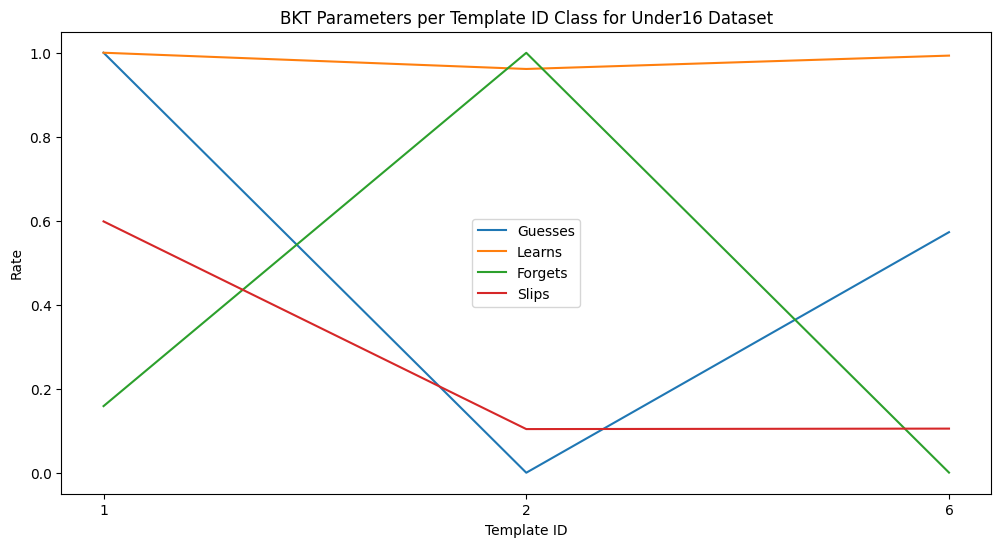

In [32]:
# We will get warnings for using indexing past lexsort. That's fine,
# and we will disable these warnings.
import warnings
warnings.simplefilter(action='ignore')

#Model Intialization
#model = Model(seed = 60, num_fits = 1)
#model.fit(data = df4,
#          forgets = True, multilearn = True, 
#          multigs = True)

# Plot the learns, forgets, slips and guesses for each of the classes.
#params = model.params()
plt.figure(figsize = (12, 6))
plt.plot(params.loc[(skill, 'guesses')], label = 'Guesses')
plt.plot(params.loc[(skill, 'learns')], label = 'Learns')
plt.plot(params.loc[(skill, 'forgets')], label = 'Forgets')
plt.plot(params.loc[(skill, 'slips')], label = 'Slips')
plt.xlabel('Template ID')
plt.ylabel('Rate')
plt.title('BKT Parameters per Template ID Class for Under16 Dataset')
plt.legend();

In [33]:
import pandas as pd

# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 1)


In [34]:
model.fit(data = df4, 
          forgets = True, multilearn = True, 
          multigs = True)
params= model.params()
params

value
skill                param   class          
Fractions            prior   default 0.00003
                     learns  1       0.99936
                             2       1.00000
                             5       0.95786
                             6       0.69840
                     guesses 1       0.77657
                             2       1.00000
                             5       0.00033
                             6       0.44806
                     slips   1       0.00000
                             2       0.33624
                             5       0.00000
                             6       0.10600
                     forgets 1       0.00003
                             2       0.66825
                             5       0.00039
                             6       0.00000
Geometry             prior   default 0.49798
                     learns  1       0.02302
                             2       1.00000
                             6       0.04644
                     guesses 1       0.00007
                             2       0.48958
                             6       0.49694
                     slips   1       0.00001
                             2       0.00001
                             6       0.00000
                     forgets 1       0.00005
                             2       0.73396
                             6       0.02816
Numbers              prior   default 0.71568
                     learns  1       0.00001
                             2       1.00000
                             6       0.15077
                     guesses 1       0.99992
                             2       0.62144
                             6       0.00017
                     slips   1       0.52056
                             2       0.15730
                             6       0.00001
                     forgets 1       0.34294
                             2       0.60456
                             6       0.00000
Percentages          prior   default 0.73513
                     learns  1       0.81525
                             6       0.00000
                     guesses 1       0.00073
                             6       0.21943
                     slips   1       0.08987
                             6       0.00463
                     forgets 1       0.50822
                             6       0.11409
Algebra              prior   default 0.00000
                     learns  1       0.00051
                             3       0.40433
                             5       0.04375
                             6       0.45335
                     guesses 1       0.00000
                             3       0.90405
                             5       0.84565
                             6       1.00000
                     slips   1       1.00000
                             3       0.99966
                             5       1.00000
                             6       1.00000
                     forgets 1       0.00000
                             3       0.00000
                             5       0.00000
                             6       0.24432
Ratio and Proportion prior   default 0.71045
                     learns  4       0.07401
                             6       0.00010
                     guesses 4       0.00423
                             6       0.17031
                     slips   4       0.29983
                             6       0.01647
                     forgets 4       0.13401
                             6       0.49341